In [1]:
# Note: The codes were originally created by Prof. Jack Baker in the MATLAB

from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
from gmpe_bjf97 import gmpe_bjf97
from gmpe_prob_bjf97 import gmpe_prob_bjf97
from scipy.interpolate import interp1d
%matplotlib inline

In [2]:
x = np.logspace(-3, np.log10(2), num=100)   # Considered IM values
T = 1   # 0.001 is the PGA case in the gmpe function
IM_label = 'SA(1 s)'

# seismicity parameters
Fault_Type = 1  # 1 is strike slip
Vs30 = 500

Text(0.525, 0.000229278440905615, '$\\lambda$(SA(1 s) > 0.5 g) = \n0.000191')

<Figure size 432x288 with 0 Axes>

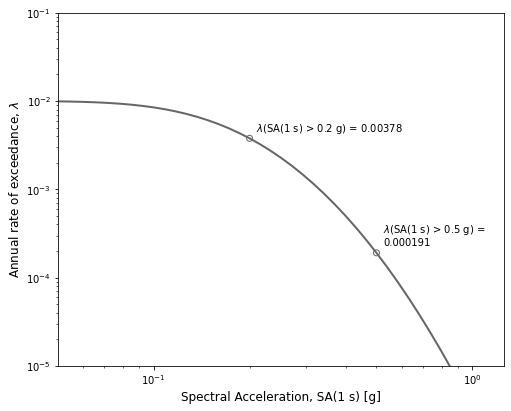

In [3]:
##############################
### Single Rupture Example ###
##############################

lambda_A = 1/100
M_A = 6.5
R_A = 10

# compute rates (and intermediate results) for specific IM levels
[medianIM, sigmaIM]  = gmpe_bjf97(M_A, R_A, T, Fault_Type, Vs30)
imLevel = [0.2, 0.5]
imProbabilitiesA = 1 - norm.cdf(np.log(imLevel),np.log(medianIM),sigmaIM)
imRateA = lambda_A * imProbabilitiesA  # get rates for two example cases

# compute rates for a range of IM levels
p_A = gmpe_prob_bjf97(x, M_A, R_A, T, Fault_Type, Vs30)
lambda_IM_A = lambda_A * p_A  # IM rates from rup_1

# Plot Fig 6.4
plt.figure(1)
fig, ax = plt.subplots(figsize=(8, 6.5))
ax.loglog(x, lambda_IM_A, linestyle='-', linewidth=2, color=[0.4, 0.4, 0.4])
ax.scatter(imLevel, imRateA, facecolors='none', edgecolor=[0.4, 0.4, 0.4])
ax.set_xlabel('Spectral Acceleration, '+IM_label+' [g]', fontsize = 12)
ax.set_ylabel('Annual rate of exceedance, $\lambda$', fontsize = 12)
ax.set_ylim(10**(-5), 10**(-1))
ax.set_xlim(10**(-1.3), 10**(0.1))
text1 = '$\lambda$(' + IM_label + ' > ' + str(imLevel[0]) + ' g) = ' + str(format(imRateA[0],".5f"))
text2 = '$\lambda$(' + IM_label + ' > ' + str(imLevel[1]) + ' g) = \n' + str(format(imRateA[1],".6f"))
ax.text(imLevel[0]*1.05, imRateA[0]*1.2, text1, fontsize=10)
ax.text(imLevel[1]*1.05, imRateA[1]*1.2, text2, fontsize=10)


<Figure size 432x288 with 0 Axes>

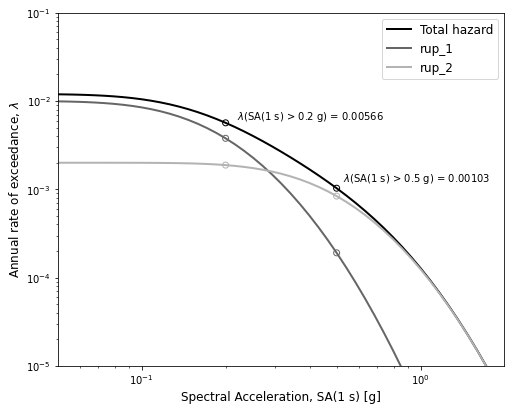

In [4]:
###########################
### Two Rupture Example ###
###########################

# Define second fault
lambda_B = 1/500
M_B = 7.5
R_B = 10

# Compute rates (and intermediate results) for specific IM levels
medianIM, sigmaIM  = gmpe_bjf97(M_B, R_B, T, Fault_Type, Vs30)
imProbabilitiesB = 1 - norm.cdf(np.log(imLevel),np.log(medianIM),sigmaIM)
imRateB = lambda_B * imProbabilitiesB # get rates for two example cases
imRateTot = imRateA + imRateB

# Compute rates for a range of IM levels
p_B = gmpe_prob_bjf97(x, M_B, R_B, T, Fault_Type, Vs30)
lambda_IM_B = lambda_B * p_B # IM rates from rup_2

lambda_IM_Tot = lambda_IM_A + lambda_IM_B

# Plot Fig 6.5
plt.figure(2)
fig, ax = plt.subplots(figsize=(8, 6.5))
ax.loglog(x, lambda_IM_Tot, 'k-', linewidth=2, label='Total hazard')
ax.loglog(x, lambda_IM_A, linestyle='-', linewidth=2, color=[0.4, 0.4, 0.4], label='rup_1')
ax.loglog(x, lambda_IM_B, linestyle='-', linewidth=2, color=[0.7, 0.7, 0.7], label='rup_2')
ax.scatter(imLevel, imRateTot, facecolors='none', edgecolor='k')
ax.scatter(imLevel, imRateA, facecolors='none', edgecolor=[0.4, 0.4, 0.4])
ax.scatter(imLevel, imRateB, facecolors='none', edgecolor=[0.7, 0.7, 0.7])
ax.set_xlabel('Spectral Acceleration, '+IM_label+' [g]', fontsize = 12)
ax.set_ylabel('Annual rate of exceedance, $\lambda$', fontsize = 12)
ax.set_ylim(10**(-5), 10**(-1))
ax.set_xlim(10**(-1.3), 10**(0.3))
text1 = '$\lambda$(' + IM_label + ' > ' + str(imLevel[0]) + ' g) = ' + str(format(imRateTot[0],".5f"))
text2 = '$\lambda$(' + IM_label + ' > ' + str(imLevel[1]) + ' g) = ' + str(format(imRateTot[1],".5f"))
ax.text(imLevel[0]*1.1, imRateTot[0]*1.1, text1, fontsize=10)
ax.text(imLevel[1]*1.05, imRateTot[1]*1.2, text2, fontsize=10)
ax.legend(loc='upper right', fontsize=12)
